In [ ]:
#house prize prediction

#supervised learning is of two types
#1. classification  : predicts a class eg yes/no
#2. regression : predicts a value eg rate

#steps
#step 1 : data preprocessing
#step 2 : data analysis
#step 3 : train test split
#step 4 : XGBoosRegressor
#step 5 : Evaluation


In [ ]:
#importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [ ]:
#importing the Boston House Price Dataset
house_price_data = pd.read_csv('/content/housing.csv')

In [ ]:
print(house_price_data)

        RM  LSTAT  PTRATIO      MEDV
0    6.575   4.98     15.3  504000.0
1    6.421   9.14     17.8  453600.0
2    7.185   4.03     17.8  728700.0
3    6.998   2.94     18.7  701400.0
4    7.147   5.33     18.7  760200.0
..     ...    ...      ...       ...
484  6.593   9.67     21.0  470400.0
485  6.120   9.08     21.0  432600.0
486  6.976   5.64     21.0  501900.0
487  6.794   6.48     21.0  462000.0
488  6.030   7.88     21.0  249900.0

[489 rows x 4 columns]


In [ ]:
house_price_data.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [ ]:
house_price_data.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


               RM     LSTAT   PTRATIO      MEDV
RM       1.000000 -0.612033 -0.304559  0.697209
LSTAT   -0.612033  1.000000  0.360445 -0.760670
PTRATIO -0.304559  0.360445  1.000000 -0.519034
MEDV     0.697209 -0.760670 -0.519034  1.000000


<Axes: >

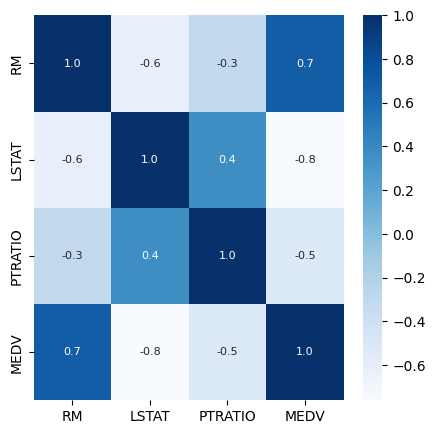

In [ ]:
correlation = house_price_data.corr()
print(correlation)

#constructing a heat map 
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar=True, fmt='.1f', annot = True, annot_kws={'size':8}, cmap ='Blues' )

#light color is negative correlation


In [ ]:
X =  house_price_data.drop(['MEDV'], axis=1)
Y = house_price_data['MEDV']
print(X)
print(Y)

        RM  LSTAT  PTRATIO
0    6.575   4.98     15.3
1    6.421   9.14     17.8
2    7.185   4.03     17.8
3    6.998   2.94     18.7
4    7.147   5.33     18.7
..     ...    ...      ...
484  6.593   9.67     21.0
485  6.120   9.08     21.0
486  6.976   5.64     21.0
487  6.794   6.48     21.0
488  6.030   7.88     21.0

[489 rows x 3 columns]
0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2, shuffle =True)

In [ ]:
#model training
model = XGBRegressor()
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
#model evaluation
training_data_prediction = model.predict(X_train)
print(training_data_prediction)




[ 405247.28  426922.75  559945.2   499750.2   181138.83  458718.4
  360702.75  657246.5   665706.94  229552.39  449962.8   356688.03
  475844.12  387991.06  726962.6   302455.84  597436.94  437218.88
  466406.53  366179.25  427043.5   377458.6   181921.48  242247.2
  360655.5   517901.5   231625.8   456420.    180035.44  509141.9
  619996.1  1008413.25  498681.2   508653.5   334431.06  373152.34
  494776.94  327879.3   264194.2   835349.    316813.47  282274.66
  366723.1   401584.56  569765.9   473543.6   576158.06  407330.5
  397615.78  500850.16  271308.66  487782.03  111468.3   441769.22
  208889.64  289186.2   685153.06  533914.9   511094.22  375052.12
  430940.84  417979.6   364737.84  590299.94  594458.2   702265.7
  530272.1   490490.72  161760.55  687188.7   477163.2   289788.62
  380863.06  490419.6   214232.94  483072.16  264607.7   661569.5
  428290.22  724769.1   220151.    478548.12  410908.    858892.
  472726.72  395720.    461245.53  472419.97  414860.88  406499.06
  3

In [ ]:
score1 = metrics.r2_score(Y_train, training_data_prediction)
print(score1)

0.9989101715438984


In [ ]:
test_data_prediction = model.predict(X_test)
score2 = metrics.r2_score(Y_test , test_data_prediction)
print(score2)

0.7895987898308828


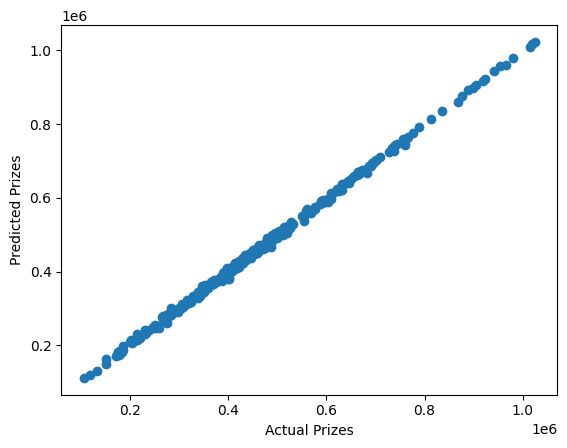

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Prizes')
plt.ylabel('Predicted Prizes')
plt.show()

In [ ]:
#changing the input data to numpy array

input_data = (6.575,4.98,15.3)
input_data_as_numpy_array = np.asarray(input_data)

#reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

[510516.88]


In [ ]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename, 'wb'))

# loading the saved model
loaded_model = pickle.load(open('trained_model.sav', 'rb'))
